In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
# f_path='C:/Windows/Fonts/malgun.ttf'
f_path='/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [27]:
df = pd.read_csv('../data/basketball.csv', index_col=0)
df.head()

,Pos,3P,2P,TRB,AST,STL,BLK
Player,,,,,,,
Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


/Users/seulgi/opt/anaconda3/envs/sesac/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/seulgi/opt/anaconda3/envs/sesac/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([[<AxesSubplot:xlabel='3P', ylabel='3P'>,
        <AxesSubplot:xlabel='2P', ylabel='3P'>,
        <AxesSubplot:xlabel='TRB', ylabel='3P'>,
        <AxesSubplot:xlabel='AST', ylabel='3P'>,
        <AxesSubplot:xlabel='STL', ylabel='3P'>,
        <AxesSubplot:xlabel='BLK', ylabel='3P'>],
       [<AxesSubplot:xlabel='3P', ylabel='2P'>,
        <AxesSubplot:xlabel='2P', ylabel='2P'>,
        <AxesSubplot:xlabel='TRB', ylabel='2P'>,
        <AxesSubplot:xlabel='AST', ylabel='2P'>,
        <AxesSubplot:xlabel='STL', ylabel='2P'>,
        <AxesSubplot:xlabel='BLK', ylabel='2P'>],
       [<AxesSubplot:xlabel='3P', ylabel='TRB'>,
        <AxesSubplot:xlabel='2P', ylabel='TRB'>,
        <AxesSubplot:xlabel='TRB', ylabel='TRB'>,
        <AxesSubplot:xlabel='AST', ylabel='TRB'>,
        <AxesSubplot:xlabel='STL', ylabel='TRB'>,
        <AxesSubplot:xlabel='BLK', ylabel='TRB'>],
       [<AxesSubplot:xlabel='3P', ylabel='AST'>,
        <AxesSubplot:xlabel='2P', ylabel='AST'>,
        <AxesSubp

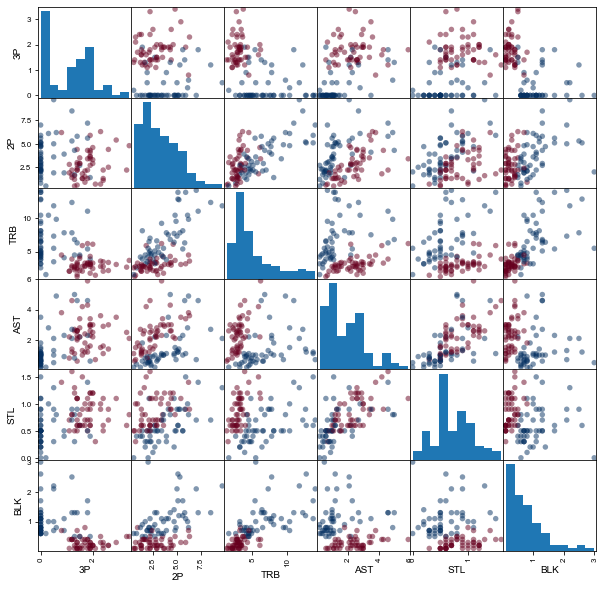

In [55]:
import copy
x_df = copy.copy(df)
del x_df['Pos']

y_df = df['Pos']
y_df[y_df == 'SG'] = 0
y_df[y_df == 'C'] = 1

pd.plotting.scatter_matrix(x_df, c=y_df, figsize=(10,10), marker='o', s=30, cmap='RdBu')

In [57]:
x = [x_df.loc[i].tolist() for i in x_df.index]
y = y_df.tolist()

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [62]:
print (len(y_train), len(y_test))
print (len(y))

80 20
100


In [67]:
from sklearn.neighbors import KNeighborsClassifier
for k in [1,3,5,7,9]:
    clf = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    print ('k : ',k)
    print ('score of training set : ', clf.score(x_train, y_train))
    print ('score of test set : ', clf.score(x_test, y_test))
    print ('')
clf.__dict__

k :  1
score of training set :  1.0
score of test set :  0.9

k :  3
score of training set :  1.0
score of test set :  0.9

k :  5
score of training set :  0.975
score of test set :  0.85

k :  7
score of training set :  0.975
score of test set :  0.85

k :  9
score of training set :  0.9625
score of test set :  0.85



{'n_neighbors': 9,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'n_features_in_': 6,
 'outputs_2d_': False,
 'classes_': array([0, 1]),
 '_y': array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[ 0. ,  2.7,  5.1,  1. ,  0.5,  1.3],
        [ 0. ,  4.7,  6.4,  1. ,  0.2,  1.4],
        [ 0. ,  0.8,  2.6,  0.4,  0.4,  0.6],
        [ 0. ,  3.1,  4.9,  0.8,  0.3,  0.6],
        [ 1.8,  2.2,  3.3,  1.5,  0.5,  0.1],
        [ 0.5,  3.6,  5.5,  1. ,  0.7,  1. ],
        [ 2.9,  5.4,  3.1,  3.5,  1.1,  0.3],
        [ 2. ,  3.3,  2.5,  3. ,  1. ,  0.2],
 

In [65]:
y_pred = clf.predict(x_test)
comparison = pd.DataFrame({'predict':y_pred, 'value':y_test})
comparison

,predict,value
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1
7,0,0
8,0,1
9,1,1
